In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# the data we got

In [25]:
df = pd.read_csv("dataviz.csv")
df = df[1:]

column_dict = {}
for a,b in enumerate(list(df.columns)):
    column_dict[a] = b

In [202]:
df = df.rename(columns={x:y for x,y in zip(df.columns,range(0,len(df.columns)))})
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,3/19/19 11:08,intensive but happy.,Python,Histogram,No,26.0,China,1,NaN,2.0,1,4.0,data visualization with real word applications.,no idea yet,dynamic plotting,to learn what is needed for a data scientist,2.0,5,4
2,3/19/19 11:08,It's intensive and the courses are helpful.,python,Scatterplot,No,28.0,Taiwan,2,NaN,3.0,1,4.0,Create cool visualization,Learn to create amazing visualization from the...,bubble plots,I hope I can visualize data fluently,4.0,5,3


In [122]:
column_dict

{0: 'Timestamp',
 1: 'In one sentence describe how you feel about this program. (for sentiment analysis)',
 2: 'Which programming language are you most comfortable using to make data visualizations?',
 3: 'What is your favorite type of plot to make?',
 4: 'Are you colorblind?',
 5: 'How old are you?',
 6: 'Where are you from?',
 7: 'How difficult is it for you to make a barplot?',
 8: "What's your favorite visualization package?",
 9: 'How difficult is it for you to make a boxplot?',
 10: 'How difficult is it for you to make a line graph?',
 11: 'How difficult is it for you to make a stacked area graph?',
 12: 'What are you most excited to learn about in this class?',
 13: 'What are you least excited about in this class?',
 14: "What is one type of plot that you're curious about but haven't made before?",
 15: 'What do you want to get out of this class?',
 16: 'How many hours a week do you expect to spend on hw for this course?',
 17: 'How interested are you in participating in data vi

# 1) Distribution of age

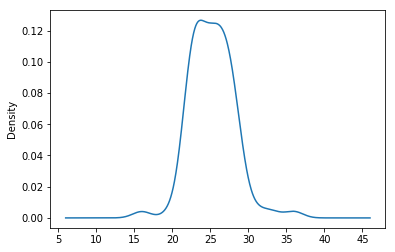

In [121]:
df[5].plot(kind='kde')

# 2) Degree of difficulty of  boxplot, line graph and stacked area graph

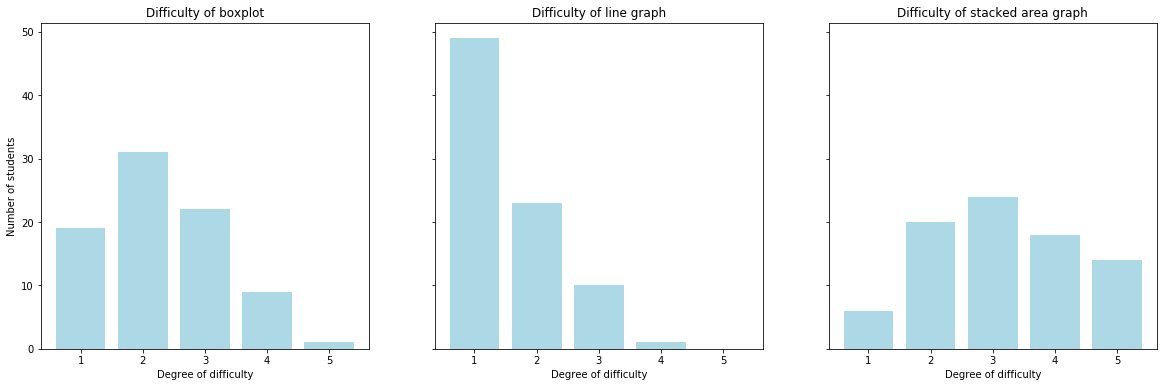

In [201]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20,6),sharex=True, sharey=True)
ax1, ax2, ax3 = axes.flatten()

ax1.bar([1,2,3,4,5], df[9].dropna().value_counts().sort_index(), label='difficulty of boxplot', color='lightblue')
ax2.bar([1,2,3,4], df[10].dropna().value_counts().sort_index(), label='difficulty of line graph', color='lightblue')
ax3.bar([1,2,3,4,5], df[11].dropna().value_counts().sort_index(), label = 'difficulty of stacked area graph', color='lightblue')

ax1.set_title("Difficulty of boxplot")
ax2.set_title("Difficulty of line graph")
ax3.set_title("Difficulty of stacked area graph")

ax1.set_xlabel('Degree of difficulty')
ax2.set_xlabel('Degree of difficulty')
ax3.set_xlabel('Degree of difficulty')
ax1.set_ylabel('Number of students')

txt = None


# 3) Languages that the students are familiar with

In [72]:
contain_python = df[2].str.contains('Python|python|matplotlib|seaborn', na=False).sum()
contain_r = df[2].str.contains('R|r|ggplot|ggplot2', na=False).sum()
contain_java = df[2].str.contains('JavaScript', na=False).sum()

In [86]:
programming = pd.DataFrame(columns = ["programming language", "number of students know this language"])
programming['programming language']=['Python', 'R', 'JavaScript']
programming['number of students know this language']=[contain_python, contain_r, contain_java]

In [87]:
programming

,programming language,number of students know this language
0,Python,59
1,R,28
2,JavaScript,1


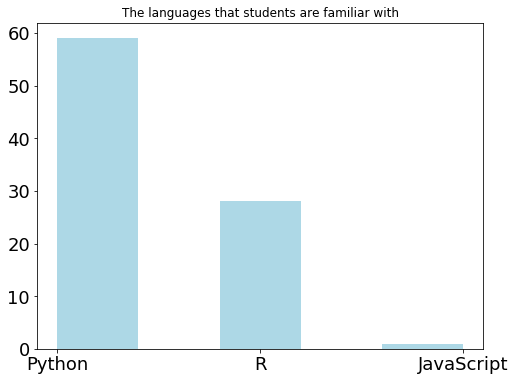

In [200]:
plt.figure(figsize=(8,6))
plt.hist(list(programming['programming language'].values), weights=programming['number of students know this language'].values, color='lightblue', bins=5)
plt.title("The languages that students are familiar with")
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

# 4) What is your favorite type of plot to make?

Text(0,0.5,'')

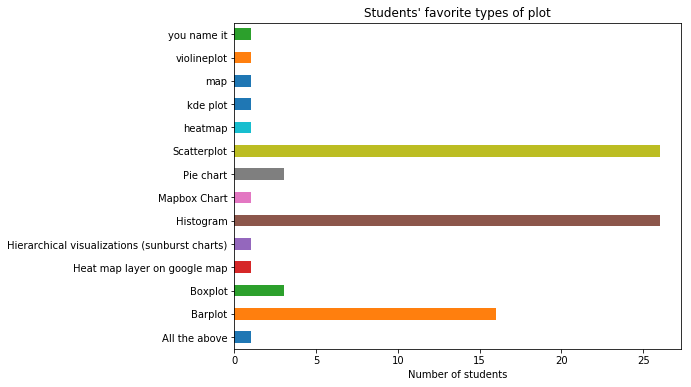

In [191]:
ax = df[3].value_counts().sort_index().plot(kind='barh',
                                    figsize=(8,6),
                                    title="Students' favorite types of plot")
ax.set_xlabel("Number of students")
ax.set_ylabel("")

# 5) Are you comfortable with presentation ?

[Text(0,0,'1'), Text(0,0,'2'), Text(0,0,'3'), Text(0,0,'4'), Text(0,0,'5')]

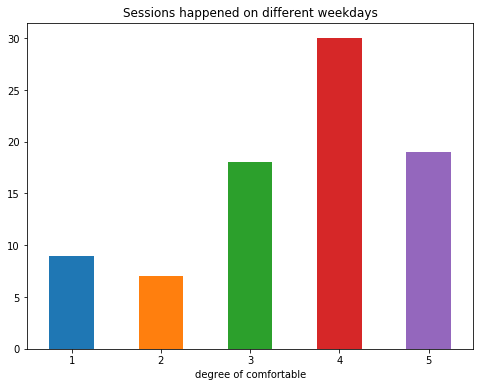

In [128]:
ax = df[18].value_counts().sort_index().plot(kind='bar',
                                    figsize=(8,6),
                                    title="Sessions happened on different weekdays")
ax.set_xlabel("degree of comfortable")
ax.set_ylabel("")
ax.set_xticklabels([1,2,3,4,5], rotation='horizontal')